In [111]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import re
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [112]:
df = (pd.read_fwf('data/train.txt', colspecs=[(0,6),(6,-1)], header=None).set_axis(['country','description'], axis=1))

In [113]:
df.head()

,country,description
0,(GER),IThe importance and popularity of travelling i...
1,(TUR),"It is an important decision , how to plan your..."
2,(CHI),Some people believe that young people can enjo...
3,(TEL),Travelling is usually considered as good recre...
4,(ARA),i agree that . Life is a person live period of...


In [114]:
df['country'].unique()

array(['(GER)', '(TUR)', '(CHI)', '(TEL)', '(ARA)', '(SPA)', '(HIN)',
       '(JPN)', '(KOR)', '(FRE)', '(ITA)'], dtype=object)

In [115]:
# df['famille'] = df['country']
# df['famille'] = df['famille'].replace(['(GER)', '(SPA)', '(FRE)', '(ITA)'], 'LIG')
# df['famille'] = df['famille'].replace(['(JPN)', '(KOR)', '(CHI)'], 'ASI')
# df['famille'] = df['famille'].replace(['(HIN)', '(TEL)'], 'HT')
# df['famille'] = df['famille'].replace(['(ARA)', '(TUR)'], 'ARTUR')

In [116]:
df['famille'] = df['country']
# df['famille'] = df['famille'].replace(['(GER)', '(FRE)'], 'LIG')
# df['famille'] = df['famille'].replace(['(JPN)', '(CHI)'], 'ASI')
# df['famille'] = df['famille'].replace(['(HIN)', '(TEL)'], 'HT')
# df['famille'] = df['famille'].replace(['(ARA)', '(TUR)'], 'ARTUR')


In [117]:
df.head()

,country,description,famille
0,(GER),IThe importance and popularity of travelling i...,(GER)
1,(TUR),"It is an important decision , how to plan your...",(TUR)
2,(CHI),Some people believe that young people can enjo...,(CHI)
3,(TEL),Travelling is usually considered as good recre...,(TEL)
4,(ARA),i agree that . Life is a person live period of...,(ARA)


In [118]:
df['famille'].unique()

array(['(GER)', '(TUR)', '(CHI)', '(TEL)', '(ARA)', '(SPA)', '(HIN)',
       '(JPN)', '(KOR)', '(FRE)', '(ITA)'], dtype=object)

In [119]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean the input text
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    # cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1]
    # cleaned_text = [lemmatizer.lemmatize(w) for w in cleaned_text]

    return " ".join(cleaned_text)

In [120]:
df['cleaned_description'] = df['description'].apply(lambda x: clean_text(x))

In [121]:
df.head()

,country,description,famille,cleaned_description
0,(GER),IThe importance and popularity of travelling i...,(GER),ithe importance and popularity of travelling i...
1,(TUR),"It is an important decision , how to plan your...",(TUR),it is an important decision how to plan your s...
2,(CHI),Some people believe that young people can enjo...,(CHI),some people believe that young people can enjo...
3,(TEL),Travelling is usually considered as good recre...,(TEL),travelling is usually considered as good recre...
4,(ARA),i agree that . Life is a person live period of...,(ARA),i agree that life is a person live period of t...


In [122]:
df['cleaned_description'][10]

'today the method of teaching is mainly discussing in all around world i think understanding ideas and concepts are more important than learning facts because of two reasons effectiveness to another proplem and make a considerated person first if we understand ideas that on the book or the profeesor explained we can easily get a solution from similar situations or problems for example we have learned 1 1 2 we know not only this answers but also its sequence to solve unless we underatand the method 1 1 2 is just fact not mine secondly we can be more considerating person by accessing solutions we could face various kinds of obstacle then we take a time to review about waht was wrong and are there any otherway to solve the problem in conclusion there is a saying that teach him how to get fish do nt teach him how to eat fish this shows what i exactly mean ignore all of the sequence is caused unhumanty soceity and unconsiderating society therefore i think to understand ideas and concepts ar

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
X = df['cleaned_description'].values.tolist()
y = df['famille'].values.tolist()

In [125]:
y[:10]

['(GER)',
 '(TUR)',
 '(CHI)',
 '(TEL)',
 '(ARA)',
 '(SPA)',
 '(GER)',
 '(GER)',
 '(HIN)',
 '(JPN)']

In [126]:
tf = TfidfVectorizer(stop_words='english')
tf_X = tf.fit_transform(X)

In [127]:
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, y, test_size=0.111, random_state=42)

In [128]:
le = preprocessing.LabelEncoder()
le.fit(df.famille.unique())

LabelEncoder()

In [129]:
le.classes_

array(['(ARA)', '(CHI)', '(FRE)', '(GER)', '(HIN)', '(ITA)', '(JPN)',
       '(KOR)', '(SPA)', '(TEL)', '(TUR)'], dtype=object)

In [130]:
tf_y_train_category = le.fit_transform(tf_y_train)
tf_y_test_category = le.fit_transform(tf_y_test)

In [131]:
tf_y_train_category[:10]

array([ 9, 10,  0,  6,  5,  9,  4,  9,  6,  3])

In [132]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=0)
clf.fit(tf_X_train, tf_y_train_category)


DecisionTreeClassifier(random_state=0)

In [133]:
y_pred = clf.predict(tf_X_test)

<AxesSubplot:>

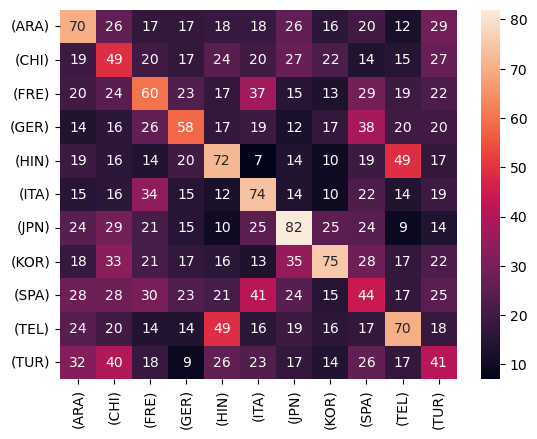

In [134]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(tf_y_test_category, y_pred)
cf_df = pd.DataFrame(cf ,index = le.classes_.tolist(), columns = le.classes_.tolist())

import seaborn as sns

sns.heatmap(cf_df, annot=True)